In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_source import DataSource
from optimizers import get_portfolio_base 

## Select tickers

For instance, if we have a list of tickers, we can select the ones that are in the list.

```python
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']
```

In our case, we have a list of tickers with the corresponding name in the tickers folder.
As an example, let us use a list of stocks.

In [13]:
# select asset classes among ['stocks', 'funds', 'bonds', 'ETF', 'indices', 'FX',]

asset_classes = ['stocks',]

all_tickers = pd.concat([pd.read_csv(f'tickers/{asset_class}.csv', sep=',') for asset_class in asset_classes])
tickers = all_tickers['ticker'].values
tickers

array(['NVDA', 'TSLA', 'SIRI', 'NIO', 'RIVN', 'AAPL', 'PARA', 'LCID',
       'AMZN', 'MARA', 'VALE', 'AMD', 'WBA', 'F', 'INTC', 'AIRC', 'LU',
       'XPEV', 'CLSK', 'GOLD', 'PLTR', 'BAC', 'IREN', 'AAL', 'ITUB'],
      dtype=object)

### Collecting the data

In [14]:
data = DataSource(tickers, '2018-01-01', '2024-01-01')
data.get_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### Computing statistics and optimizing the portfolio

In [28]:
data.get_stats()
data.stats
port = get_portfolio_base(data.stats, data.corr_matrix)

In [30]:
# multivariate analysis
port.to_csv('portfolios.csv', index=False)

#### Output example


In [43]:
port

,assets,weights,corr,mean_ret,std_ret
0,"[NVDA, TSLA, MARA, AMD, CLSK]","[0.0999999999999896, 0.0999999999999941, 0.100...",0.512724,0.405703,10.111995
1,"[TSLA, NIO, MARA, AMD, CLSK]","[0.10000000000001014, 0.10000000000000608, 0.0...",0.503729,0.404108,10.385251
2,"[TSLA, MARA, AMD, CLSK, PLTR]","[0.099999999999994, 0.10000000000000003, 0.099...",0.544150,0.402952,10.252930
3,"[NVDA, TSLA, NIO, MARA, CLSK]","[0.09999999999994949, 0.0999999999999688, 0.09...",0.509719,0.401389,10.360583
4,"[NVDA, NIO, MARA, AMD, CLSK]","[0.09999999999999062, 0.09999999999999026, 0.1...",0.505444,0.400318,10.307161
...,...,...,...,...,...
53125,"[PARA, WBA, LU, GOLD, AAL]","[0.10000000000000006, 0.10000000000000027, 0.5...",0.508977,-0.125199,4.166631
53126,"[PARA, WBA, INTC, LU, AAL]","[0.09999999999999987, 0.0999999999999994, 0.10...",0.530597,-0.125300,4.183156
53127,"[PARA, WBA, LU, BAC, AAL]","[0.09999999999999992, 0.09999999999999991, 0.6...",0.538623,-0.125694,4.158926
53128,"[SIRI, PARA, WBA, LU, AAL]","[0.10000000000000128, 0.09999999999999937, 0.1...",0.517386,-0.125905,4.183722


Text(0, 0.5, 'Mean Return')

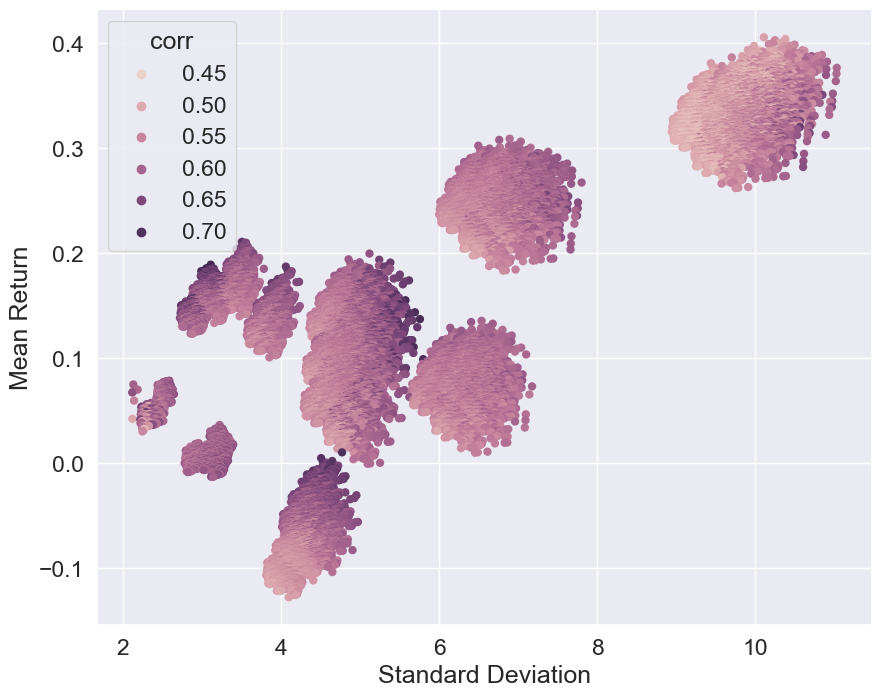

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_theme(style="darkgrid", palette="muted", font_scale=1.5)
sns.scatterplot(x='std_ret', y='mean_ret', data=port, ax=ax,
                hue='corr', linewidth=0.,)
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Mean Return')